[View in Colaboratory](https://colab.research.google.com/github/hemantkshirsagar8/ML_Projects/blob/master/tensorflow_ambulance_detection_01.ipynb)

In [0]:
import pandas as pd
from IPython.display import Image, display
#testing: import an image
from PIL import Image
from cv2 import imread

In [2]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Preconfiguring packages ...
Selecting previously unselected package cron.
(Reading database ... 18408 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-128ubuntu5_amd64.deb ...
Unpacking cron (3.0pl1-128ubuntu5) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../01-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../02-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../03-dbus_1.10.22-1ubuntu1_amd64.deb ...
Unpacking dbus (1.10.22-1ubuntu1) ...
Selecting previously unselected package dirmngr.
Preparing to unpack .../04-dirmngr_2.1.15-1ubuntu8.1_amd64.deb ...
Unpacking dirmngr (2.1.15-1ubuntu8.1) ...
Selecting previously unselected package distro-info-data.
Preparing to unpack .

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
# classification of bored nd healthy tomotoes
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
# Initialising the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Part 2 - Fitting the CNN to the images
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('drive/ml/tomatoes/data/train',
target_size = (64, 64),
batch_size = 32,
class_mode = 'binary')
test_set = test_datagen.flow_from_directory('drive/ml/tomatoes/data/test',
target_size = (64, 64),
batch_size = 32,
class_mode = 'binary')
classifier.fit_generator(training_set,
steps_per_epoch = 100,
epochs = 5,
validation_data = test_set,
validation_steps = 30)
# Part 3 - Making new predictions
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('drive/ml/tomatoes/data/prediction/bored/DSC03776.JPG', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'bored'
else:
  prediction = 'healthy'

print(prediction)

Found 111 images belonging to 2 classes.
Found 43 images belonging to 2 classes.
Epoch 1/5
100/100 [==============================] - 292s 3s/step - loss: 0.2079 - acc: 0.9112 - val_loss: 0.1455 - val_acc: 0.9535
Epoch 2/5
100/100 [==============================] - 249s 2s/step - loss: 0.0440 - acc: 0.9878 - val_loss: 0.2137 - val_acc: 0.9535
Epoch 3/5
100/100 [==============================] - 250s 2s/step - loss: 0.0106 - acc: 0.9984 - val_loss: 0.3446 - val_acc: 0.9535
Epoch 4/5
100/100 [==============================] - 249s 2s/step - loss: 0.0026 - acc: 0.9997 - val_loss: 0.3835 - val_acc: 0.9535
Epoch 5/5
100/100 [==============================] - 250s 3s/step - loss: 0.0039 - acc: 0.9994 - val_loss: 0.3456 - val_acc: 0.9302
healthy


In [0]:
test_image = image.load_img('drive/ml/tomatoes/data/prediction/bored/DSC03776.JPG', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'healthy'
else:
  prediction = 'bored'

print(prediction)

bored


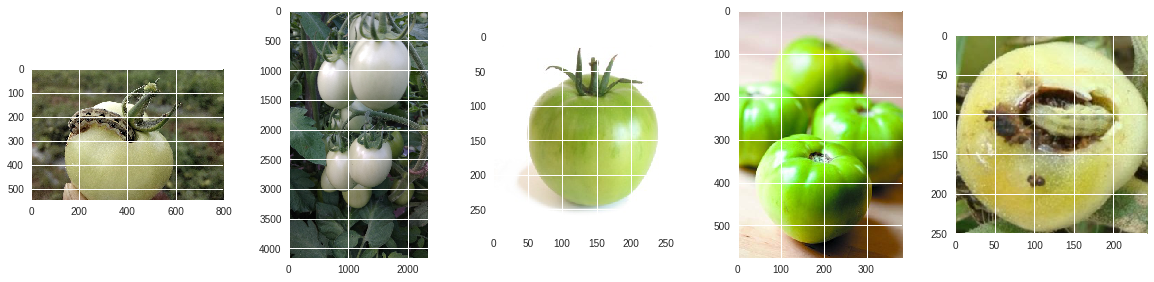

In [6]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

images = []
for img_path in glob.glob('drive/ml/tomatoes/data/prediction/healthy/*.jpg'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)